In [1]:
from Gprocess import roach as rch
import matplotlib.pyplot as plt
import tqdm as tqdm
from time import time

from gem.utils import graph_util
from gem.evaluation import visualize_embedding as viz
from gem.evaluation import evaluate_graph_reconstruction as gr

from gem.embedding.hope import HOPE
from argparse import ArgumentParser

In [2]:
l = []
with open('train.txt') as data:
    for line in data:
        l.append(line)
triple = rch.split_raw_triple(l)
triple

[['land_reform.n.01', '_hypernym', 'reform.n.01\n'],
 ['cover.v.01', '_derivationally_related_form', 'covering.n.02\n'],
 ['botany.n.02', '_derivationally_related_form', 'botanize.v.01\n'],
 ['kamet.n.01', '_instance_hypernym', 'mountain_peak.n.01\n'],
 ['question.n.01', '_derivationally_related_form', 'ask.v.01\n'],
 ['arachnida.n.01', '_derivationally_related_form', 'arachnoid.a.01\n'],
 ['hoist.v.03', '_hypernym', 'raise.v.02\n'],
 ['empathy.n.01', '_hypernym', 'sympathy.n.02\n'],
 ['disengagement.n.02', '_hypernym', 'retreat.n.01\n'],
 ['mutant.n.01', '_derivationally_related_form', 'deviate.v.02\n'],
 ['equisetum.n.01', '_hypernym', 'fern_genus.n.01\n'],
 ['write.v.01', '_also_see', 'write_out.v.01\n'],
 ['queen.n.02', '_hypernym', 'female_aristocrat.n.01\n'],
 ['working_dog.n.01', '_hypernym', 'dog.n.01\n'],
 ['charge.n.11', '_hypernym', 'request.n.02\n'],
 ['primulaceae.n.01', '_member_meronym', 'glaux.n.01\n'],
 ['proteaceae.n.01', '_member_meronym', 'bartle_frere.n.01\n'],
 ['

In [3]:
triple = rch.delete_edge(triple)


In [4]:
for edge in triple:
    edge[1] = edge[1].strip()
triple

[['land_reform.n.01', 'reform.n.01'],
 ['cover.v.01', 'covering.n.02'],
 ['botany.n.02', 'botanize.v.01'],
 ['kamet.n.01', 'mountain_peak.n.01'],
 ['question.n.01', 'ask.v.01'],
 ['arachnida.n.01', 'arachnoid.a.01'],
 ['hoist.v.03', 'raise.v.02'],
 ['empathy.n.01', 'sympathy.n.02'],
 ['disengagement.n.02', 'retreat.n.01'],
 ['mutant.n.01', 'deviate.v.02'],
 ['equisetum.n.01', 'fern_genus.n.01'],
 ['write.v.01', 'write_out.v.01'],
 ['queen.n.02', 'female_aristocrat.n.01'],
 ['working_dog.n.01', 'dog.n.01'],
 ['charge.n.11', 'request.n.02'],
 ['primulaceae.n.01', 'glaux.n.01'],
 ['proteaceae.n.01', 'bartle_frere.n.01'],
 ['lodge.v.04', 'accommodation.n.04'],
 ['subduer.n.01', 'restrainer.n.02'],
 ['piciformes.n.01', 'animal_order.n.01'],
 ['check.n.09', 'nick.v.02'],
 ['badmouth.v.01', 'defamation.n.01'],
 ['propagator.n.02', 'circulate.v.02'],
 ['lace.n.01', 'lace.v.04'],
 ['department_of_justice.n.01', 'executive_department.n.01'],
 ['needlewood.n.01', 'shrub.n.01'],
 ['expand.v.02', '

In [5]:
key = rch.nodemap(triple)
key
keyinv = rch.mapback(key)

In [6]:
ntriple = rch.preprocess(triple, key)
len(ntriple)

86835

In [7]:
adj = rch.getadjlist(ntriple, keyinv)

100%|███████████████████████████████████████████████████████████████████████████| 40714/40714 [03:40<00:00, 184.85it/s]


In [8]:
with open('adjwn18.txt', 'w') as f:
    for key, value in adj.items(): 
        f.write('%s:%s\n' % (key, value))
    print("File written successfully")
    f.close()

File written successfully


In [9]:
len(adj)

40714

In [10]:
ntriple

[[0, 1],
 [2, 3],
 [4, 5],
 [6, 7],
 [8, 9],
 [10, 11],
 [12, 13],
 [14, 15],
 [16, 17],
 [18, 19],
 [20, 21],
 [22, 23],
 [24, 25],
 [26, 27],
 [28, 29],
 [30, 31],
 [32, 33],
 [34, 35],
 [36, 37],
 [38, 39],
 [40, 41],
 [42, 43],
 [44, 45],
 [46, 47],
 [48, 49],
 [50, 51],
 [52, 53],
 [54, 55],
 [56, 57],
 [58, 59],
 [60, 61],
 [62, 63],
 [64, 65],
 [66, 67],
 [68, 69],
 [70, 71],
 [72, 73],
 [74, 75],
 [76, 77],
 [78, 79],
 [80, 81],
 [82, 83],
 [84, 85],
 [86, 87],
 [88, 89],
 [90, 91],
 [92, 93],
 [94, 95],
 [96, 97],
 [98, 99],
 [100, 101],
 [102, 103],
 [104, 105],
 [106, 107],
 [108, 109],
 [110, 111],
 [112, 113],
 [114, 115],
 [116, 117],
 [118, 119],
 [120, 121],
 [122, 123],
 [124, 125],
 [126, 127],
 [128, 129],
 [130, 131],
 [132, 133],
 [134, 135],
 [136, 137],
 [138, 139],
 [140, 141],
 [142, 143],
 [144, 145],
 [146, 147],
 [148, 149],
 [150, 151],
 [152, 91],
 [153, 154],
 [155, 156],
 [157, 158],
 [159, 160],
 [161, 162],
 [163, 164],
 [165, 166],
 [167, 168],
 [169,

In [11]:
degreedist = rch.getdegreedist(ntriple)
degreedist

{0: 2,
 2: 5,
 4: 3,
 6: 1,
 8: 5,
 10: 7,
 12: 1,
 14: 2,
 16: 4,
 18: 6,
 20: 2,
 22: 7,
 24: 1,
 26: 1,
 28: 3,
 30: 9,
 32: 16,
 34: 5,
 36: 4,
 38: 4,
 40: 3,
 42: 4,
 44: 2,
 46: 1,
 48: 10,
 50: 1,
 52: 2,
 54: 3,
 56: 2,
 58: 1,
 60: 4,
 62: 2,
 64: 3,
 66: 1,
 68: 5,
 70: 1,
 72: 2,
 74: 2,
 76: 10,
 78: 1,
 80: 4,
 82: 2,
 84: 1,
 86: 5,
 88: 4,
 90: 2,
 92: 2,
 94: 2,
 96: 4,
 98: 2,
 100: 2,
 102: 2,
 104: 13,
 106: 2,
 108: 4,
 110: 6,
 112: 49,
 114: 3,
 116: 3,
 118: 1,
 120: 2,
 122: 7,
 124: 1,
 126: 1,
 128: 3,
 130: 1,
 132: 57,
 134: 5,
 136: 2,
 138: 2,
 140: 3,
 142: 3,
 144: 3,
 146: 3,
 148: 2,
 150: 2,
 152: 2,
 153: 5,
 155: 1,
 157: 3,
 159: 1,
 161: 3,
 163: 5,
 165: 4,
 167: 4,
 169: 3,
 171: 2,
 173: 3,
 175: 2,
 177: 2,
 179: 2,
 181: 6,
 183: 3,
 185: 5,
 187: 2,
 189: 2,
 191: 1,
 193: 57,
 195: 3,
 197: 3,
 199: 3,
 201: 6,
 203: 7,
 205: 1,
 207: 5,
 209: 3,
 211: 3,
 213: 2,
 215: 6,
 217: 1,
 219: 5,
 221: 3,
 223: 2,
 225: 2,
 227: 3,
 229: 2,
 231

In [12]:
sgraph = rch.getsubgraph(ntriple, [785, 1038, 60], adj, hops = 2)

In [13]:
sgkey = rch.nodemap(sgraph)
sgkeyinv = rch.mapback(sgkey)

In [14]:
sgraph = rch.preprocess(sgraph, sgkey)

In [15]:
len(sgraph)

1369

In [16]:
sgraph = rch.drop_duplicate_node(sgraph)

In [17]:
with open('2hopsubgraphwn18.edgelist', 'w') as s:
    for item in sgraph:
        s.write('{} {}\n'.format(item[0], item[1]))
    print('File written successfully')
                 
s.close()

File written successfully


In [18]:
edge_f = "2hopsubgraphwn18.edgelist"
isDirected = True
G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
G = G.to_directed()

In [29]:
edge_f = "3hopsubgraphwn18.edgelist"
isDirected = True
G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
G = G.to_directed()
nodes = list(G.nodes())
with open("3hopsgnodes.edgelist", 'w') as h:
    for item in nodes:
        h.write('{}\n'.format(item))
    print("File written successfully")
h.close()

File written successfully


In [19]:
dim = 16
embedding = HOPE(d = dim, beta = 0.01)
print('Num nodes: %d, num edges: %d' % (G.number_of_nodes(), G.number_of_edges()))
Y = embedding.learn_embedding(graph=G, is_weighted=True, no_python=True)
t1 = time()
print(embedding.get_method_name()+':\n\tTraining time: %f' % (time() - t1))
MAP, prec_curv, err, err_baseline = gr.evaluateStaticGraphReconstruction(G, embedding, Y, None)
print(("\tMAP: {} \t precision curve: {}\n\n\n\n"+'-'*100).format(MAP, prec_curv[:5]))

Num nodes: 1146, num edges: 1369
SVD error (low rank): 0.233061
hope_gsvd:
	Training time: 0.000000
	MAP: 0.10385196792273033 	 precision curve: [0.0, 0.5, 0.6666666666666666, 0.75, 0.8]



----------------------------------------------------------------------------------------------------


In [20]:
import pandas as pd
labels = []
for i in range(1, dim + 1):
    labels.append("D{}".format(i))
    
df = pd.DataFrame(Y, columns = tuple(labels))

In [21]:
df

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16
0,-1.242454e-05,5.431819e-18,-3.153000e-05,5.398590e-05,1.642975e-04,7.298938e-17,-3.426060e-17,-4.637432e-01,-1.418251e-07,2.307235e-18,-2.377141e-07,3.033815e-07,7.054931e-07,2.053595e-19,7.274147e-19,-4.321601e-04
1,-1.999027e-07,6.384032e-18,-1.596349e-07,1.396448e-07,2.386682e-07,-4.833877e-18,5.873562e-19,-3.027044e-05,-5.634375e-06,1.533776e-18,-1.055542e-05,1.413163e-05,3.378704e-05,6.933476e-18,-4.483903e-20,-2.156346e-02
2,-4.087910e-08,6.121255e-19,-4.525365e-08,4.304895e-08,7.649233e-08,-3.566881e-19,-1.038150e-18,-1.016888e-05,-7.163303e-06,4.569950e-18,-1.200609e-05,1.532253e-05,3.563129e-05,4.479424e-18,-2.677820e-18,-2.182628e-02
3,-3.215391e-08,1.063385e-18,-3.978577e-08,3.970311e-08,7.253315e-08,-1.269211e-18,-1.636528e-18,-1.004644e-05,-5.634375e-06,3.997103e-18,-1.055542e-05,1.413163e-05,3.378704e-05,4.438357e-18,-2.587388e-18,-2.156346e-02
4,-3.215391e-08,-1.597960e-19,-3.978577e-08,3.970311e-08,7.253315e-08,-1.597156e-20,1.159770e-19,-1.004644e-05,-5.634375e-06,3.997103e-18,-1.055542e-05,1.413163e-05,3.378704e-05,4.438534e-18,-2.568412e-18,-2.156346e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,-1.109900e-19,-3.397525e-19,-1.087693e-19,2.063178e-18,-5.755017e-20,3.732424e-19,-5.983998e-19,7.262487e-19,-1.120452e-18,4.807172e-04,5.448484e-20,-1.202381e-19,4.220000e-19,2.007784e-03,-1.360747e-03,1.328629e-18
1142,1.290402e-19,1.284854e-18,-1.777379e-20,-3.143938e-18,-4.280782e-19,-2.839421e-19,1.029625e-18,-9.519955e-19,1.294851e-18,4.807172e-04,-7.483875e-19,-1.435704e-18,1.121523e-18,2.007784e-03,-1.360747e-03,1.323086e-18
1143,3.044002e-19,1.765650e-19,2.140665e-19,-3.092655e-18,-2.315658e-19,-4.434349e-19,1.009668e-18,-7.819568e-19,-1.037426e-19,4.807172e-04,5.448189e-20,-2.604913e-19,4.221586e-19,2.007784e-03,-1.360747e-03,1.281303e-18
1144,-4.703719e-20,-1.741608e-19,-2.023107e-20,6.464835e-19,3.108552e-20,1.722767e-19,-1.386597e-19,1.876122e-19,1.630282e-18,-3.823799e-18,2.022621e-18,-2.264738e-19,-2.627086e-19,1.103165e-19,-2.502221e-20,5.964949e-20


In [22]:
df.to_csv("2hopsgemb.csv", index = False)

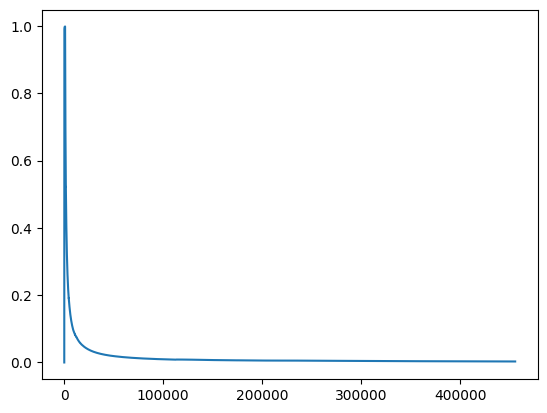

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, len(prec_curv) + 1)
plt.plot(x, prec_curv)
plt.show()